In [2]:
from binascii import hexlify
import hashlib
import random

We will use SHA-224

In [3]:
h = hashlib.sha224

Let's has an ASCII string. We will print the output will as a hexadecimal string

In [9]:
x = b"test message"
y = h(x)
y.hexdigest()

'a7d719e1268444c7f6fae4d48645b422a492f6f8e46b667a6b3b6464'

In [17]:
# generate a random string of n bytes
def random_bytes(n):
    return bytearray(random.getrandbits(8) for i in range(n))

The following function returns the first $n$ bytes of a hash function

In [12]:
# calculate a truncated hash to n bytes
def truncated_hash(hashfun,n,x):
    y = hashfun(x)
    return y.digest()[0:n]

In [27]:
# return a function that calculates a truncated hash:
def truncated_hash_fun(hashfun,n):
    def h(x):
        return truncated_hash(hashfun,n,x)
    return h

The following function tries to find a preimage using brute force.

In [22]:
# find preimage of truncated hash using brute force
# the size of the input (512 bits) is arbitrary
def find_preimage(h,y,attempts):
    for i in range(attempts):
        x = random_bytes(64)
        if y == h(x):
            return x
    return None

Consider a hash function with output size 16 bits. Let's find the preimage for the value 000...0000

In [46]:
y = b'00'
n = len(y)
h_n = truncated_hash_fun(h,n)
x = find_preimage(h_n,y,1000000) 
if x is not None:
    print("The preimage is ",x.hex())
else:
    print("Preimage not found")

The preimage is  5de6eea729485744bb7a6d2f3487fd7ffbf68af85ea8d1dd5ab077f04d3fa7ec2677f9549bfc9c19612e58eaf0763550d7f5db9c2552ba81b40e8a2b0f2d82bf


Calculate the probability of finding a preimage of size $n$ bytes

In [47]:
def probability_finding_preimage(n, attempts):
    # number of trials is arbitrary, it should be large enough to actually see several successes
    trials = 1000
    success = 0
    h_n = truncated_hash_fun(h,n)
    y = random_bytes(n)
    for i in range(trials):
        if ( find_preimage(h_n,y,attempts) is not None ):
            success = success + 1
    return success/trials

In [58]:
def theoretical_preimage(n, attempts):
    return 1-pow( 1-1.0/pow(2,8*n), attempts)

Try with $n=16$ bit and $q=1000$ attempts

In [59]:
n = 2
attempts = 1000
print ("theory: ", theoretical_preimage(n, attempts))
# print ("theory: ", attempts/pow(2,8*len(preimage)))
print ("measured: ",1.0*probability_finding_preimage(n,attempts))

theory:  0.0151430782613492
measured:  0.0110000000000000


Let's plot a picture for $n=8$ bit

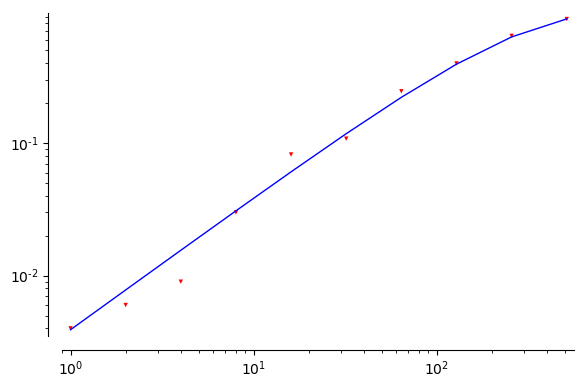

In [71]:
n = 1
theoretical_data = [ (2^la, theoretical_preimage(n, 2^la) ) for la in range(10) ]
simulation = [ (2^la, 1.0*probability_finding_preimage(n, 2^la) ) for la in range(10) ]
sum([
    list_plot(theoretical_data, scale='loglog', plotjoined=True),
    list_plot(simulation, scale='loglog',color='red',marker='v')
])

Now we try to find collisions

In [72]:
def find_collision(h,attempts):
    dictionary = {}
    for i in range(attempts):
        x = random_bytes(64)
        y = h(x)
        if y in dictionary:
            return (dictionary[y],x)
        else:
            dictionary[y]=x
    return None

In [73]:
def probability_finding_collision(n,attempts):
    trials = 1000
    success = 0
    h_n = truncated_hash_fun(h,n)
    for i in range(trials):
        if ( find_collision(h_n,attempts) is not None ):
            success = success + 1
    return success/trials

In [86]:
def theoretical_collision(n,attempts):
    return 1-1*exp( -(attempts*(attempts-1.0)/pow(2,8*n+1) )) 

In [87]:
n = 2
attempts = 1000
print ("theory: ", theoretical_collision(n,attempts) )
#print ("theory: ", n(attempts*attempts/pow(2,8*hash_len+1)))
print ("measured: ",1.0*probability_finding_collision(n,attempts))

theory:  0.999510323278542
measured:  1.00000000000000


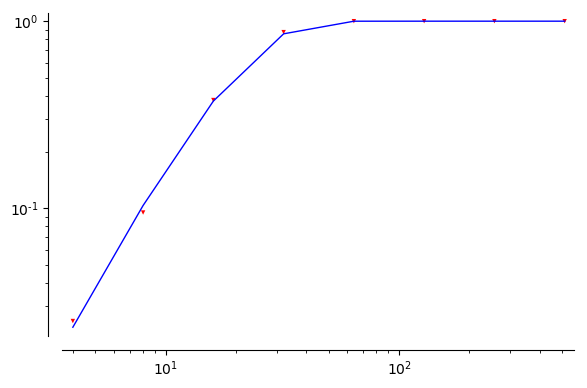

In [89]:
n = 1
theoretical_data = [ (2^la, theoretical_collision(n, 2^la) ) for la in range(2,10) ]
simulation = [ (2^la, 1.0*probability_finding_collision(n, 2^la) ) for la in range(2,10) ]
sum([
    list_plot(theoretical_data, scale='loglog', plotjoined=True),
    list_plot(simulation, scale='loglog',color='red',marker='v')
])